In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão de Python Neste Jupyter Notebook:', python_version())

- Instalando o SciPy
- Instalando o PIL
- Redimensionando imagens
- Comparando exibições e cópias
- Lançando Lena
- Indexação sofisticada
- Indexação com uma lista de locais
- Indexação com booleanos
- Stride truques para Sudoku
- matrizes de transmissão

O NumPy é famoso por seus arrays eficientes. Essa fama se deve em parte à facilidade de indexação. Demonstraremos truques avançados de indexação usando imagens. Antes de mergulhar na indexação, instalaremos o software necessário — SciPy e PIL.

Alguns dos exemplos envolverão a manipulação de imagens. Para fazer isso, vamos exigir a imagem do Python.

Biblioteca (PIL) ; mas não se preocupe, instruções e dicas para ajudá-lo a instalar o PIL e outros softwares Python necessários são fornecidos ao longo do capítulo, quando necessário.

### Instalando o SciPy

SciPy é a biblioteca científica do Python e está intimamente relacionada ao NumPy.
Há uma chance de você já ter instalado este software como parte da instalação do NumPy. SciPy e NumPy costumavam ser o mesmo projeto há muitos anos.

- Instalando no Windows: Se você já tiver o Python instalado, o método
preferido é baixar e usar a distribuição binária. Alternativamente, você pode querer instalar a distribuição Enthought Python, que vem com outro software Python científico pacotes.

- Verifique sua instalação: Verifique a instalação do SciPy com o
seguinte código:

In [ ]:
import scipy

print(scipy.__version__)
print(scipy.__file__)

Isso deve imprimir a versão SciPy correta.

### Instalando o PIL

PIL, a biblioteca de imagens Python, é um pré-requisito para os processamentos de imagem.

- Installing PIL on Windows: Install using the Windows
executable from the PIL website.

http://www.pythonware.com/products/pil/.

### Redimensionando imagens

In [ ]:
def lena():
    import pickle
    import numpy
    
    fname = 'data/lena.dat'
    f = open(fname,'rb')
    lena = numpy.array(pickle.load(f))
    f.close()
    
    return lena

carregaremos uma imagem de amostra de Lena, que está disponível na distribuição SciPy, em um array. A propósito, usaremos apenas os dados da imagem como entrada.

Vamos redimensionar a imagem usando a função de repetição. Essa função repete um array, o que na prática significa redimensionar a imagem por um determinado fator.

1. Carregue a imagem Lena em um array.

O SciPy possui uma função lena , que pode carregar a imagem em um Matriz NumPy:

In [ ]:
lena = lena()

Alguma refatoração ocorreu desde a versão 0.10, portanto, se você estiver usando uma versão mais antiga, o código correto é:

In [ ]:
lena = lena()

2. Verifique a forma.

Verifique a forma do array Lena usando a função `assert_equal` do pacote `numpy.testing` — este é um teste de verificação de sanidade opcional:

In [ ]:
import numpy

In [ ]:
LENA_X = 512
LENA_Y = 512

numpy.testing.assert_equal((LENA_X, LENA_Y), lena.shape)

3. Redimensione a matriz Lena.

Redimensione o array Lena com a função `repeat()`. Damos a esta função um fator de redimensionamento na direção x e y:

In [ ]:
redimensionado = lena.repeat(LENA_Y, axis = 0).repeat(LENA_X, axis = 1)

4. Plote as matrizes.

Vamos plotar a imagem Lena e a imagem redimensionada em duas subtramas que fazem parte da mesma grade. Plote a matriz Lena em uma subtrama:

In [ ]:
import matplotlib

In [ ]:
matplotlib.pyplot.subplot(211)
matplotlib.pyplot.imshow(lena)

A função de subtrama do Matplotlib cria uma subtrama. Esta função aceita um inteiro de 3 dígitos como parâmetro, onde o primeiro dígito é o número de linhas, o segundo dígito é o número de colunas e o último dígito é o índice da subtrama começando com 1. A função imshow mostra imagens .

Por fim, a função show exibe o resultado final.

Plote a matriz redimensionada em outra subtrama e exiba-a. O índice agora é 2:

In [ ]:
matplotlib.pyplot.subplot(212)
matplotlib.pyplot.imshow(redimensionado)
matplotlib.pyplot.show()

A captura de tela a seguir é o resultado com a imagem original(primeira) e a imagem redimensionada(segunda):

In [ ]:
# A seguir está o código completo para esta receita:

import sys
import matplotlib.pyplot 
import numpy.testing

# Este script redimensiona a imagem Lena do Scipy.
if(len(sys.argv) != 3): 
    print("Uso python %s yfactor xfactor" % (sys.argv[0])) 
    sys.exit()

# Carrega a imagem Lena em um array lena =
lena = lena()

#Dimensões de Lena
LENA_X = 512
LENA_Y = 512

#Verifique a forma do array Lena
numpy.testing.assert_equal((LENA_X, LENA_Y), lena.shape)

# Obtenha os fatores de redimensionamento 
yfactor = float(sys.argv[1]) 
xfactor = float(sys.argv[2])

# redimensione o array Lena
redimensionado = lena.repeat(yfactor, axis = 0).repeat(xfactor, axis = 1)

#Verifique a forma do array redimensionado
numpy.testing.assert_equal((LENA_Y, LENA_Y), redimensionado.shape)

# Plotar o array Lena
matplotlib.pyplot.subplot(211)
matplotlib.pyplot.imshow(lena)

#Plote a matriz redimensionada
matplotlib.pyplot.subplot(212)
matplotlib.pyplot.imshow(redimensionado)
matplotlib.pyplot.show()

A função repeat repete arrays, o que, nesse caso, resultou na alteração do
tamanho da imagem original. A função de subtrama do Matplotlib cria uma
subtrama. A função imshow mostra imagens.

Por fim, a função show exibe o resultado final.

### Criando exibições e cópias

É importante saber quando estamos lidando com uma exibição de array compartilhada equando temos uma cópia dos dados do array. Uma fatia, por exemplo, criará umaexibição. Isso significa que, se você atribuir a fatia a uma variável e depois alterar a matriz subjacente, o valor dessa variável será alterado. Vamos criar um array a partir da famosa imagem do Lena, copiar o array, criar uma view e, ao final, modificar a view.

Os pré-requisitos são os mesmos da receita anterior.

Vamos criar uma cópia e visualizações do array Lena:

1. Crie uma cópia do array Lena:

In [ ]:
acopy = lena.copy()

2. Crie uma exibição da matriz:

In [ ]:
aview = lena.view()

3. Defina todos os valores da exibição como 0 com um iterador simples:

In [ ]:
aview.flat = 0

O resultado final é que apenas uma das imagens mostra a modelo da Playboy. Os outros são censurados completamente:

A seguir está o código deste tutorial mostrando o comportamento de visualizações e cópias de array:

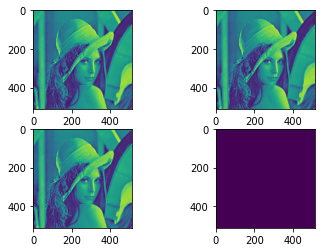

In [27]:
import matplotlib.pyplot

lena = lena() 
acopy = lena.copy()
aview = lena.view()

# Plotar o array Lena
matplotlib.pyplot.subplot(221)
matplotlib.pyplot.imshow(lena)

#Plote a cópia
matplotlib.pyplot.subplot(222)
matplotlib.pyplot.imshow(acopy)

#Plote a visualização 
matplotlib.pyplot.subplot(223)
matplotlib.pyplot.imshow(aview)

# Plota a visualização após as alterações
aview.flat = 0
 
matplotlib.pyplot.subplot(224)
matplotlib.pyplot.imshow(aview)
matplotlib.pyplot.show()

### Lançando Lena

Estaremos lançando a imagem do SciPy Lena - tudo em nome da ciência, é claro, ou pelo menos como uma demonstração. Além de inverter a imagem, vamos cortá-la e aplicar uma máscara nela.

1. Plote a imagem invertida.

Vire a matriz Lena em torno do eixo vertical usando o seguinte código:

In [ ]:
matplotlib.pyplot.imshow(lena[:,::-1])

2. Trace uma fatia da imagem.

Pegue uma fatia da imagem e plote-a. Nesta etapa, veremos a forma do array Lena. A forma é uma tupla que representa as dimensões da matriz. O código a seguir seleciona efetivamente o quadrante superior esquerdo da imagem da Playboy.

In [ ]:
matplotlib.pyplot.imshow(lena[:lena.shape[0]/2,:lena.shape[1]/2])

3. Aplique uma máscara à imagem.

Aplique uma máscara à imagem encontrando todos os valores na matriz Lena que são pares (isso é arbitrário apenas para fins de demonstração). Copie a matriz e altere os valores pares para 0. Isso tem o efeito de colocar muitos pontos azuis (manchas escuras se você estiver olhando para uma imagem em preto e branco) na imagem:

In [ ]:
mascara = lena % 2 == 0
mascara_lena = lena.copy()
mascara_lena[mascara] = 0

Todos esses esforços resultam em uma grade de imagem 2 por 2, conforme mostrado na captura de tela a seguir:

In [ ]:
# A seguir está o código completo para esta receita:
import matplotlib.pyplot

# Carrega o array Lena
lena = lena()

# Plotar o array Lena
matplotlib.pyplot.subplot(221)
matplotlib.pyplot.imshow(lena)

#Plote a matriz invertida
matplotlib.pyplot.subplot(222)
matplotlib.pyplot.imshow(lena[:,::-1])

#Plote uma matriz de fatias 
matplotlib.pyplot.subplot(223)
matplotlib.pyplot.imshow(lena[:lena.shape[0]/2, :lena.shape[1]/2])

# Aplique uma máscara 
mascara = lena % 2 == 0 
mascara_lena = lena.copy()
mascara_lena[mascara] = 0

matplotlib.pyplot.subplot(224)
matplotlib.pyplot.imshow(mascara_lena)
matplotlib.pyplot.show()


#Plote a matriz invertida
matplotlib.pyplot.subplot(222)
matplotlib.pyplot.imshow(lena[:,::-1])

#Plote uma matriz de fatias 
matplotlib.pyplot.subplot(223)
matplotlib.pyplot.imshow(lena[:lena.shape[0]/2,:lena.shape[1]/2])

# Plotar o array Lena
matplotlib.pyplot.subplot(221)
matplotlib.pyplot.imshow(lena)

### indexação sofisticada

aplicaremos uma indexação sofisticada para definir os valores diagonais da imagem Lena como 0. Isso desenhará linhas pretas ao longo das diagonais, cruzando-as, não porque haja algo errado com a imagem, mas apenas como um exercício. A indexação sofisticada é a indexação que não envolve números inteiros ou fatias, o que é uma indexação normal.

Começaremos com a primeira diagonal:

1. Defina os valores da primeira diagonal como 0.

Para definir os valores diagonais como 0, precisamos definir dois intervalos diferentes para os valores x e y :

In [ ]:
# lena[range(xmax), range(ymax)] = 0

2. Defina os valores da outra diagonal como 0.

Para definir os valores da outra diagonal, precisamos de um conjunto diferente de intervalos, mas os princípios permanecem os mesmos:

In [ ]:
# lena[range(xmax-1,-1,-1), range(ymax)] = 0

No final, obtemos esta imagem com as diagonais riscadas, conforme mostra a captura de tela a seguir:

In [ ]:
# A seguir está o código completo:

import matplotlib.pyplot

# Este script demonstra indexação sofisticada definindo valores # nas diagonais como 0.
# Carrega o array Lena 

lena = scipy.misc.lena() 
xmax = lena.shape[0] 
ymax = lena.shape[1]

# Indexação sofisticada
# Definir valores na diagonal para 0 
# # x 0-xmax 
# # y 0-

lena[range(xmax), range(ymax)] = 0
     
 # Definir valores na outra diagonal para 0 # x
xmax-0 # y 0-
ymax

lena[range(xmax-1,-1,-1), range(ymax)] = 0

# Traçar Lena com linhas diagonais definidas como 0
matplotlib.pyplot.imshow(lena)
matplotlib.pyplot.show()

Definimos intervalos separados para os valores x e valores y. Esses intervalos foram usados para indexar a matriz Lena. A indexação sofisticada é executada com base em um objeto iterador NumPy interno. As três etapas a seguir são executadas:

1. O objeto iterador é criado.

2. O objeto iterador é vinculado ao array.

3. Os elementos da matriz são acessados por meio do iterador.

### Indexação com uma lista de locais

Vamos usar a função ix_ para embaralhar a imagem do Lena. Esta função cria uma malha de várias sequências.

Começaremos embaralhando aleatoriamente os índices do array:

1. Embaralhe os índices da matriz.

Crie uma matriz de índices aleatórios com a função shuffle do módulo numpy.random :

In [ ]:
def shuffle_indices(tamanho): 
    arr = numpy.arange(size)
    numpy.random.shuffle(arr)
    retorno arr

2. Trace os índices embaralhados:

In [ ]:
matplotlib.pyplot.imshow(lena[numpy.ix_(xindices, yindices)])

O que obtemos é uma imagem de Lena completamente embaralhada, conforme mostrado na captura de tela a seguir:

In [ ]:
# A seguir está o código completo da receita:

import matplotlib.pyplot 
import numpy.random 
import numpy.testing
# Carrega o array Lena 
lena = lena() 
xmax = lena.shape[0] 
ymax = lena.shape[1]
def shuffle_indices(tamanho): 
    arr = numpy.arange(size)
    numpy.random.shuffle(arr)
    return arr

xindices = shuffle_indices(xmax)
numpy.testing.assert_equal(len(xindices), xmax) 
yindices = shuffle_indices(ymax)
numpy.testing.assert_equal(len(yindices), ymax)
# Plot L
enamatplotli bp yplo ti mshow (lena [ nump yi x ( xindices , yindices ) ] ) matplotli
bp yplo ts how ( )

### Indexação com booleanos

A indexação booleana é a indexação baseada em uma matriz booleana e se enquadra na categoria de indexação sofisticada.

Aplicaremos esta técnica de indexação a uma imagem:

1. Imagem com pontos na diagonal.

Isso é de alguma forma semelhante à receita de indexação Fancy , neste capítulo. Desta vez, selecionamos o módulo 4 pontos na diagonal da imagem:

In [ ]:
def get_indices(tamanho): 
    arr = numpy.arange(tamanho)
    return arr % 4 == 0

Depois é só aplicar essa seleção e plotar os pontos:

In [ ]:
lena1 = lena.copy()
xindices = get_indices(lena.shape[0]) 
yindices = get_indices(lena.shape[1])
lena1[xindices, yindices] = 0 

matplotlib.pyplot.subplot(211)
matplotlib.pyplot.imshow (lena1)

2. Defina como 0 com base no valor.

Selecione os valores da matriz entre um quarto e três quartos do valor máximo e defina-os como 0:

In [ ]:
lena2[(lena > lena.max()/4) & (lena < 3 * lena.max()/4)] = 0

O gráfico com as duas novas imagens terá a seguinte aparência:

In [ ]:
# A seguir está o código completo para esta receita:

import matplotlib.pyplot 
import numpy

# Carrega o array Lena 
lena = lena()

def get_indices(tamanho):
    arr = numpy.arange(tamanho) 
    return arr % 4 == 0

# Gráfico Lena
lena1 = lena.copy()
xindices = get_indices(lena.shape[0])

yindices = get_indices(lena.shape[1])
lena1[xindices, yindices] = 0
matplotlib.pyplot.subplot(211)
matplotlib.pyplot.imshow(lena1) 
lena2 = lena.copy()


# Entre um quarto e 3 quartos do valor máximo 
lena2[(lena > lena.max()/4) & (lena < 3 * lena.max()/4)] = 0 
matplotlib.pyplot.subplot(212)
matplotlib. pyplot.imshow(lena2)

matplotlib.pyplot.show()

Como a indexação booleana é uma forma sofisticada de indexação, a maneira como ela funciona é basicamente a mesma. Isso significa que a indexação ocorre com a ajuda de um objeto iterador especial.

### Stride truques para Sudoku

A classe ndarray tem um campo strides , que é uma tupla que indica o número de bytes a serem percorridos em cada dimensão ao passar por um array. Vamos aplicar alguns truques de passos largos ao problema de dividir um quebra-cabeça Sudoku nos quadrados 3 por 3 que o compõem.

1. Defina a matriz do quebra-cabeça Sudoku

Vamos definir a matriz do quebra-cabeça Sudoku. Este é preenchido com o conteúdo de um quebra-cabeça de Sudoku real e resolvido:

In [ ]:
sudoku = numpy.array([[2, 8, 7, 1, 6, 5, 9, 4, 3], 
                      [9, 5, 4, 7, 3, 2, 1, 6, 8], 
                      [6, 1, 3, 8, 4, 9, 7, 5, 2],
                      [8, 7, 9, 6, 5, 1, 2, 3, 4], 
                      [4, 2, 1, 3, 9, 8, 6, 7, 5],
                      [3, 6, 5, 4, 2, 7, 8, 9, 1],
                      [1, 9, 8, 5, 7, 3, 4, 2, 6],
                      [5, 4, 2, 9, 1, 6, 3, 8, 7], 
                      [7, 3, 6, 2, 8, 4, 5, 1, 9] ])

2. Calcule os passos. O campo itemsize de ndarray nos dá o número de bytes em um array. Usando o itemsize, calcule os passos:

In [ ]:
passos = sudoku.itemsize * numpy.array([27, 3, 9, 1])

3. Divida em quadrados.

Agora podemos dividir o quebra-cabeça em quadrados com a função `as_strided` do módulo `numpy.lib.stride_tricks`:

In [ ]:
quadrados = numpy.lib.stride_tricks.as_strided(sudoku, forma=forma, print(quadrados))

Isso imprime quadrados de Sudoku separados:

In [ ]:
[[[[2 8 7] [9 5 4] [6 1 3]] 
  [[1 6 5] [7 3 2] [8 4 9]]
  [[9 4 3] [1 6 8] [7 5 2]]]
 
 [[[8 7 9] [4 2 1] [3 6 5]]
  [[6 5 1] [3 9 8] [4 2 7]]
  [[2 3 4] [6 7 5] [8 9 1]]]
 
 [[[1 9 8] [5 4 2] [7 3 6]] 
  [[5 7 3] [9 1 6] [2 8 4]]
  [[4 2 6] [3 8 7] [5 1 9]]]
 ]

In [ ]:
# A seguir está o código-fonte completo para esta receita:
import numpy

sudoku = numpy.array([[2, 8, 7, 1, 6, 5, 9, 4, 3],
                      [9, 5, 4, 7, 3, 2, 1, 6, 8],
                      [6, 1, 3, 8, 4, 9, 7, 5, 2],
                      [8, 7, 9, 6, 5, 1, 2, 3, 4],
                      [4, 2, 1, 3, 9, 8, 6, 7, 5], 
                      [3, 6, 5, 4, 2, 7, 8, 9, 1],
                      [1, 9, 8, 5, 7, 3, 4, 2, 6], 
                      [5, 4, 2, 9, 1, 6, 3, 8, 7],
                      [7, 3, 6, 2, 8, 4, 5, 1, 9]])

forma = (3, 3, 3, 3)

passos = sudoku.itemsize * numpy.array([27, 3, 9, 1])
squares = numpy.lib.stride_tricks.as_strided(sudoku, shape=shape, strid print(squares)

### matrizes de transmissão

Sem saber, você pode ter transmitido matrizes. Em poucas palavras, o NumPy tenta realizar uma operação mesmo que os operandos não tenham a mesma forma. Vamos multiplicar um array e um escalar. O escalar é "estendido" para a forma do operando array e então a multiplicação é realizada. Vamos baixar um arquivo de áudio e fazer uma nova versão mais silenciosa.

Vamos começar lendo um arquivo WAV:

1. Lendo um arquivo WAV.

Usaremos um código Python padrão para baixar um arquivo de áudio de Austin Powers chamado "Smashing, baby". O SciPy possui um módulo wavfile , que permite carregar dados de som ou gerar arquivos WAV. Se o SciPy estiver instalado, já devemos ter este módulo. A função de leitura retorna uma matriz de dados e uma taxa de amostragem. Neste exemplo, nos preocupamos apenas com os dados:

In [ ]:
# sample_rate, data = scipy.io.wavfile.read(WAV_FILE)

2. Plote os dados WAV originais.

Plote os dados WAV originais com Matplotlib. Dê à subtrama o título Original.

In [ ]:
matplotlib.pyplot.subplot(2, 1, 1)
matplotlib.pyplot.title("Original")
matplotlib.pyplot.plot(data)

3. Crie uma nova matriz.

Agora vamos usar o NumPy para fazer uma amostra de áudio mais silenciosa. É apenas uma questão de criar uma nova matriz com valores menores por multiplicando por uma constante. É aqui que ocorre a mágica da transmissão. No final, precisamos ter certeza de que temos o mesmo tipo de dados do array original, por causa do formato WAV:

In [ ]:
newdata = data * 0.2
newdata = newdata.astype(numpy.uint8)

4. Grave em um arquivo WAV.

Essa nova matriz pode ser gravada em um novo arquivo WAV da seguinte maneira:

In [ ]:
scipy.io.wavfile.write("data/quiet.wav", sample_rate, newdata)

5. Trace os novos dados WAV.

Plote a nova matriz de dados com Matplotlib:

In [ ]:
matplotlib.pyplot.subplot(2, 1, 2)
matplotlib.pyplot.title("Quiet")
matplotlib.pyplot.plot(newdata)

matplotlib.pyplot.show()

O resultado é um gráfico dos dados do arquivo WAV original e uma nova matriz com valores menores, conforme mostrado na captura de tela a seguir:

In [ ]:
# A seguir está o código completo:

import scipy.io.wavfile 
import matplotlib.pyplot 
import urllib2
import numpy

response = urllib2.urlopen('http://www.thesoundarchive.com/austinpowers')
print(response.info())

WAV_FILE = 'smashingbaby.wav'
filehandle = open(WAV_FILE, 'w')
filehandle.write(response.read())
filehandle.close()
sample_rate, data = scipy.io.wavfile.read(WAV_FILE) 
print("Tipo de dados ", data.dtype, "Forma", data.shape)

matplotlib.pyplot.subplot(2, 1, 1)
matplotlib.pyplot.title("Original")
matplotlib.pyplot.plot(data)

newdata = data * 0.2
newdata = newdata.astype(numpy.uint8) 
print("Data type", newdata.dtype, "Shape", newdata.shape)

scipy.io.wavfile.write("quiet.wav", sample_rate, newdata)

matplotlib.pyplot.subplot(2, 1, 2)
matplotlib.pyplot.title("Quiet")
matplotlib.pyplot.plot(newdata)

matplotlib.pyplot.show()

In [ ]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

### End.